<a href="https://colab.research.google.com/github/kimgeonhee317/d2l-notes/blob/main/notebook/2_6_Probability_and_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial

In [13]:
# visualization utilities
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline

# we can visualize the slopes of functions using matplotlib library
def use_svg_display():
  backend_inline.set_matplotlib_formats('svg')

# set figsize
def set_figsize(figsize=(2.5, 2.5)):
  use_svg_display()
  plt.rcParams['figure.figsize'] = figsize


# set axes
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
  axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
  axes.set_xscale(xscale), axes.set_yscale(yscale)
  axes.set_xlim(xlim), axes.set_ylim(ylim)
  if legend:
    axes.legend(legend)

  axes.grid()



# with above three functions, we can define plot()
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

## 2.6.1 A Simple Example: Tossing Coin

In [5]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(100)])
tails  = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [47, 53]


In [7]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([51., 49.])

In [8]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.4300, 0.5700])

tensor([[0.0000e+00, 1.0000e+00],
        [0.0000e+00, 2.0000e+00],
        [1.0000e+00, 2.0000e+00],
        ...,
        [5.0250e+03, 4.9730e+03],
        [5.0250e+03, 4.9740e+03],
        [5.0250e+03, 4.9750e+03]])
[[0.         1.        ]
 [0.         1.        ]
 [0.33333334 0.6666667 ]
 ...
 [0.5026005  0.49739948]
 [0.50255024 0.49744976]
 [0.5025     0.4975    ]]


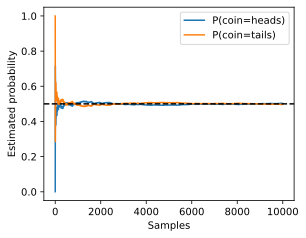

In [16]:
counts = Multinomial(1, fair_probs).sample((10000,)) #
cum_counts = counts.cumsum(dim=0)
print(cum_counts)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()
print(estimates)

set_figsize((4.5, 3.5))
plt.plot(estimates[:, 0], label=("P(coin=heads)"))
plt.plot(estimates[:, 1], label=("P(coin=tails)"))
plt.axhline(y=0.5, color='black', linestyle='dashed')
plt.gca().set_xlabel('Samples')
plt.gca().set_ylabel('Estimated probability')
plt.legend();

## 2.6.2 A More Formal Treatment

A probability function maps event onto real values. ${P: \mathbf{A} \subseteq \mathbf{S} \rightarrow [0,1]}$
The probability of an event $\mathbf{A}$ in the given sample space $\mathbf{S}$
+ The probability of any event
 is a nonnegative real number, i.e.,
$P(\mathbf{A}) \geq 0$;
+ The probability of entire sample space is 1, i.e., $P(\mathbf{S}) = 1$;
+ For any countable sequence of events that are mutually exlusive($\mathbf{A}_i \cap \mathbf{A}_j = \emptyset$ for all $ i \neq j $), the probability that any of them happens is equal to the sum of their individual probabilities, i.e., $P(\bigcup_{i=1}^{\infty} \mathbf{A}_i) = \sum_{i=1}^{\infty} P(\mathbf{A}_i)$


## 2.6.3 Random Variables

Formally, random variables are mappings from an underlying sample space to a set of values

## 2.6.4 Multiple Random Variables

Probabilities to each of these combinations (e.g. $A = a$ and $B = b$) is called the _joint probability_ function and simply returns the probability assigned to the intersection of the corresponding subsets of the sample space

> Recovering individual distributions $P(A)$ and $P(B)$.

To recover $P(A=a)$, we simply sum up $P(A = a, B = v)$ over all values $v$ that the random variable $B$ can take: $P(A = a) = \sum_{v} P(A=a, B=v) $

> Bayes' theorem

$$
P(A \mid B) = \frac{P(B\mid A) P(A)}{P(B)}.
$$

In some cases we might not have direct access to $P(B)$, such as the prevalence of symtoms. In this case a simplified version of Bayes' theorem comes in handy:

$$
P(A \mid B) \propto P(B \mid A) P(A).
$$

Since we know that $P(A \mid B)$ must be normalized to 1, i.e., $\sum_a P(A=a \mid, B) = 1$, we can use it to compute

$$
P(A \mid B) = \frac{P(B \mid A) P(A)}{\sum_a P(B \mid A=a) P(A = a)}.
$$


Note that $\sum_a P(A=a \mid B) = 1$ also allows us to marginalize over random variables. That is, we can drop variables from a joint distribution such as $P(A, B)$. After all, we have that
$$
\sum_a P(B \mid A=a) P(A=a) = \sum_a P(B, A=a) = P(B).
$$

> Conditionally Independent

Two random variables $A$ and $B$ are conditionally independent given a third variable $C$ if and only if $ P(A, B \mid C) = P(A \mid C)P(B \mid C) $

Interestingly, two variables can be independent in general but become dependent when conditioning on a third. This often occurs when the two random variables $A$ and $B$ correspond to cause of some third variable $C$.

And conversely, two dependent random variables can become independent upon conditioning on third. This happens when two otherwise unrelated events have a common cause.


## 2.6.5 An Example
Skip


## 2.6.6 Expectations

In general, the expectation of random variable $X$ is defined as
$$

$$
E[X] = E_{x \sim P}[x] = \sum_{x} x P(X = x).
$$

Likewise, for densities we obtain
$$
E[X] = \int x \;dp(x)
$$
Sometimes, we are intrested in the expected value of some function of $x$. We can calculate these expectations as

$$
E_{x \sim P}[f(x)] = \sum_x f(x) P(x) \textrm{ and } E_{x \sim P}[f(x)] = \int f(x) p(x) \;dx
$$